In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math, seaborn
import sklearn.linear_model
import os


%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 50)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False, function=numpy.mean):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values, statistic=function)
    if numpy.nan in bars:
        return pattern % function(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (function(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((function(values),) + bars)

def median_with_errorbars(values, decimals=0, plusminus=False, function=numpy.median):
    return mean_with_errorbars(values, decimals, plusminus, function)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
cohort_df = pandas.read_csv("../additional-files/Additional File 1.csv")
cohort_df

,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,other snv mutations,other snv neoantigens,other snv expressed neoantigens,snv mutations,snv neoantigens,snv expressed neoantigens,mnv mutations,mnv neoantigens,mnv expressed neoantigens,indel mutations,indel neoantigens,indel expressed neoantigens,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,etoposide,nab-paclitaxel,farletuzumab/placebo
0,AOCS-001-1-7,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.335747,0.270605,0.293826,5686.0,104.0,71.0,0.010268,0.016393,0.000000,0.014925,0.131148,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
1,AOCS-004-1-5,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.435291,0.362958,0.519262,6587.0,48.0,20.0,0.008726,0.000000,0.000000,0.029851,0.172414,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
2,AOCS-005-1-8,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.525860,0.456709,0.373072,5582.0,60.0,36.0,0.005167,0.000000,0.000000,0.033898,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
3,AOCS-034-1-0,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.249783,0.223347,0.270322,6858.0,154.0,58.0,0.007520,0.005988,0.016949,0.051020,0.071856,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
4,AOCS-034-3-8,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1597,...,0.371331,0.434420,0.497789,13091.0,259.0,123.0,0.010501,0.003731,0.008065,0.045752,0.029851,0.000000,True,True,True,True,False,True,False,False,False,False,False,False,False
5,AOCS-055-1-7,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_055_I...,ICGCDBPC20130205011,SA505316,OV-AU,AOCS-055-1-7,SP101526,AOCS-055-1,DO46330,AOCS-055,2150.0,82.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0,...,0.593488,0.512771,0.607863,14583.0,152.0,91.0,0.004165,0.000000,0.000000,0.013423,0.116279,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False
6,AOCS-056-1-X,ICGCDBLG2010062229TR,AOCS-056-2-3,AOCS_056_ICGC_DBPC_20130205_013,AOCS-056-1-X,primary tumou

In [4]:
#cohort_df.ix[cohort_df["bam_filename_tumor_rna"].str.contains("EGAZ00001018819")]
#cohort_df.ix[cohort_df["bam_filename_tumor_rna"].str.contains("EGAZ00001018723")]
#cohort_df.ix[cohort_df["bam_filename_tumor_rna"].str.contains("EGAZ00001018562")]

In [60]:
cibersort_arun_df = pandas.read_table("/Users/tim/sinai/git/ovarian-cancer/projects/australian-cohort/patch-cibersort.tsv")
cibersort_arun_df["SampleId"] = cibersort_arun_df.SampleId.map(
    lambda s: s.split("/")[-1]
    .replace("-cufflinks_output-genes.fpkm_tracking", "")
    .split("_")[-1])

cibersort_arun_df["T cells"] = cibersort_arun_df[[x for x in cibersort_arun_df.columns if x.startswith("T cells")]].sum(1, skipna=False)
cibersort_arun_df.columns = [
    (c + " arun") if c != "SampleId" else c
    for c in cibersort_arun_df.columns
]
merged_df = cohort_df.merge(cibersort_arun_df, left_on="RNA_id", right_on="SampleId", how="outer")
merged_df["has_cibersort arun"] = ~merged_df["T cells arun"].isnull()
cibersort_arman_df = pandas.read_table("../data/CIBERSORT_output.tsv.clean")

def one(items, debug_msg=''):
    if len(items) > 1:
        print("Multiple items: %s" % str(items))
    if not len(items):
        print("No items: %s" % debug_msg)
        return None
    return list(items)[0]

cibersort_arman_df["source_id"] = [
    one(cohort_df.ix[cohort_df["bam_filename_tumor_rna"].str.contains(row.Names)].source_id, row.Names)
    for _, row in cibersort_arman_df.iterrows()
]
cibersort_arman_df
cibersort_arman_df["T cells"] = cibersort_arman_df[[x for x in cibersort_arman_df.columns if x.startswith("T cells")]].sum(1, skipna=False)

merged_df = merged_df.merge(cibersort_arman_df, on="source_id", how="outer")
merged_df

donor_data_df = pandas.read_table("../data/donor.tsv")
merged_df = merged_df.merge(donor_data_df, how='outer', left_on='donor', right_on='submitted_donor_id')
merged_df

No items: EGAZ00001018713
No items: EGAZ00001018777


,source_id,RNA_id,RNA biospecimen,DNA_id,DNA_biospecimen,specimen_type_description,CollectionPoint,SpecimenType,RNA data file,DNA_sample_string,icgc_sample_id,project_code_x,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id_x,submitted_donor_id_x,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,study_specimen_involved_in,specimen_type,specimen_type_other,specimen_interval,...,Pearson Correlation,RMSE,Unnamed: 26,T cells,icgc_donor_id_y,project_code_y,study_donor_involved_in,submitted_donor_id_y,donor_sex,donor_vital_status,disease_status_last_followup,donor_relapse_type,donor_age_at_diagnosis,donor_age_at_enrollment,donor_age_at_last_followup,donor_relapse_interval,donor_diagnosis_icd10,donor_tumour_staging_system_at_diagnosis,donor_tumour_stage_at_diagnosis,donor_tumour_stage_at_diagnosis_supplemental,donor_survival_time,donor_interval_of_last_followup,prior_malignancy,cancer_type_prior_malignancy,cancer_history_first_degree_relative
0,AOCS-001-1-7,ICGCDBDE20130916001,AOCS-001-2-0,AOCS_001_ICGC_DBPC_20130205_002,AOCS-001-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...,ICGCDBPC20130205002,SA505244,OV-AU,AOCS-001-1-7,SP101515,AOCS-001-1,DO46325,AOCS-001,1895.0,73.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0.0,...,0.340445,0.943021,NaN,0.370057,DO46325,OV-AU,PCAWG,AOCS-001,female,deceased,relapse,NaN,54.0,54.0,55.0,21.0,C48.2,FIGO,III,NaN,477.0,477.0,unknown,NaN,unknown
1,AOCS-004-1-5,ICGCDBDE20130916003,AOCS-004-2-9,AOCS_004_ICGC_DBPC_20130205_004,AOCS-004-1-5,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...,ICGCDBPC20130205004,SA505270,OV-AU,AOCS-004-1-5,SP101519,AOCS-004-1,DO46327,AOCS-004,1350.0,77.0,61-80%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0.0,...,0.225140,0.989779,NaN,0.191944,DO46327,OV-AU,PCAWG,AOCS-004,female,deceased,progression,NaN,54.0,54.0,54.0,NaN,C56,FIGO,III,NaN,184.0,184.0,unknown,NaN,unknown
2,AOCS-005-1-8,ICGCDBDE20130916004,AOCS-005-2-1,AOCS_005_ICGC_DBPC_20130205_006,AOCS-005-1-8,primary tumour,Primary,Tumour,130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_005_I...,ICGCDBPC20130205006,SA505282,OV-AU,AOCS-005-1-8,SP101521,AOCS-005-1,DO46328,AOCS-005,2128.0,90.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0.0,...,0.165645,1.020655,NaN,0.418803,DO46328,OV-AU,PCAWG,AOCS-005,female,deceased,relapse,NaN,52.0,52.0,54.0,167.0,C56,FIGO,III,NaN,972.0,972.0,unknown,NaN,unknown
3,AOCS-034-1-0,ICGCDBLG2010050402TR,AOCS-034-2-4,AOCS_034_ICGC_DBPC_20130205_009,AOCS-034-1-0,primary tumour,Primary,Tumour,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205009,SA505297,OV-AU,AOCS-034-1-0,SP101523,AOCS-034-1,DO46329,AOCS-034,1953.0,84.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0.0,...,0.381634,0.924195,NaN,0.241081,DO46329,OV-AU,PCAWG,AOCS-034,female,deceased,relapse,NaN,52.0,52.0,56.0,381.0,C56,FIGO,III,NaN,1699.0,1699.0,unknown,NaN,unknown
4,AOCS-034-3-8,ICGCDBDE20131122024,AOCS-034-4-1,AOCS_034_ICGC_DBPC_20130205_007,AOCS-034-3-8,recurrent ascitic fluid,Recurrence,Ascites,131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_034_IC...,ICGCDBPC20130205007,SA505303,OV-AU,AOCS-034-3-8,SP101524,AOCS-034-13,DO46329,AOCS-034,110.0,99.0,>81%,NaN,NaN,Recurrent tumour - other,recurrent ascitic fluid,1597.0,...,0.143836,1.026577,NaN,0.264945,DO46329,OV-AU,PCAWG,AOCS-034,female,deceased,relapse,NaN,52.0,52.0,56.0,381.0,C56,FIGO,III,NaN,1699.0,1699.0,unknown,NaN,unknown
5,AOCS-055-1-7,ICGCDBDE20130916005,AOCS-055-2-0,AOCS_055_ICGC_DBPC_20130205_011,AOCS-055-1-7,primary tumour,Primary,Tumour,130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_055_I...,ICGCDBPC20130205011,SA505316,OV-AU,AOCS-055-1-7,SP101526,AOCS-055-1,DO46330,AOCS-055,2150.0,82.0,>81%,PCAWG,PCAWG,Primary tumour - solid tissue,NaN,0.0,...,0.139442,1.020970,NaN,0.229505,DO46330,OV-AU,PCAWG,AOCS-055,female,deceased,relapse,NaN,60.0,60.0,61.0,175.0,C56,FIGO,III,NaN,684.0,684.0,unknown,NaN,unknown
6,AOCS-056-1-X,ICGCDBLG2010062229TR,AOCS-

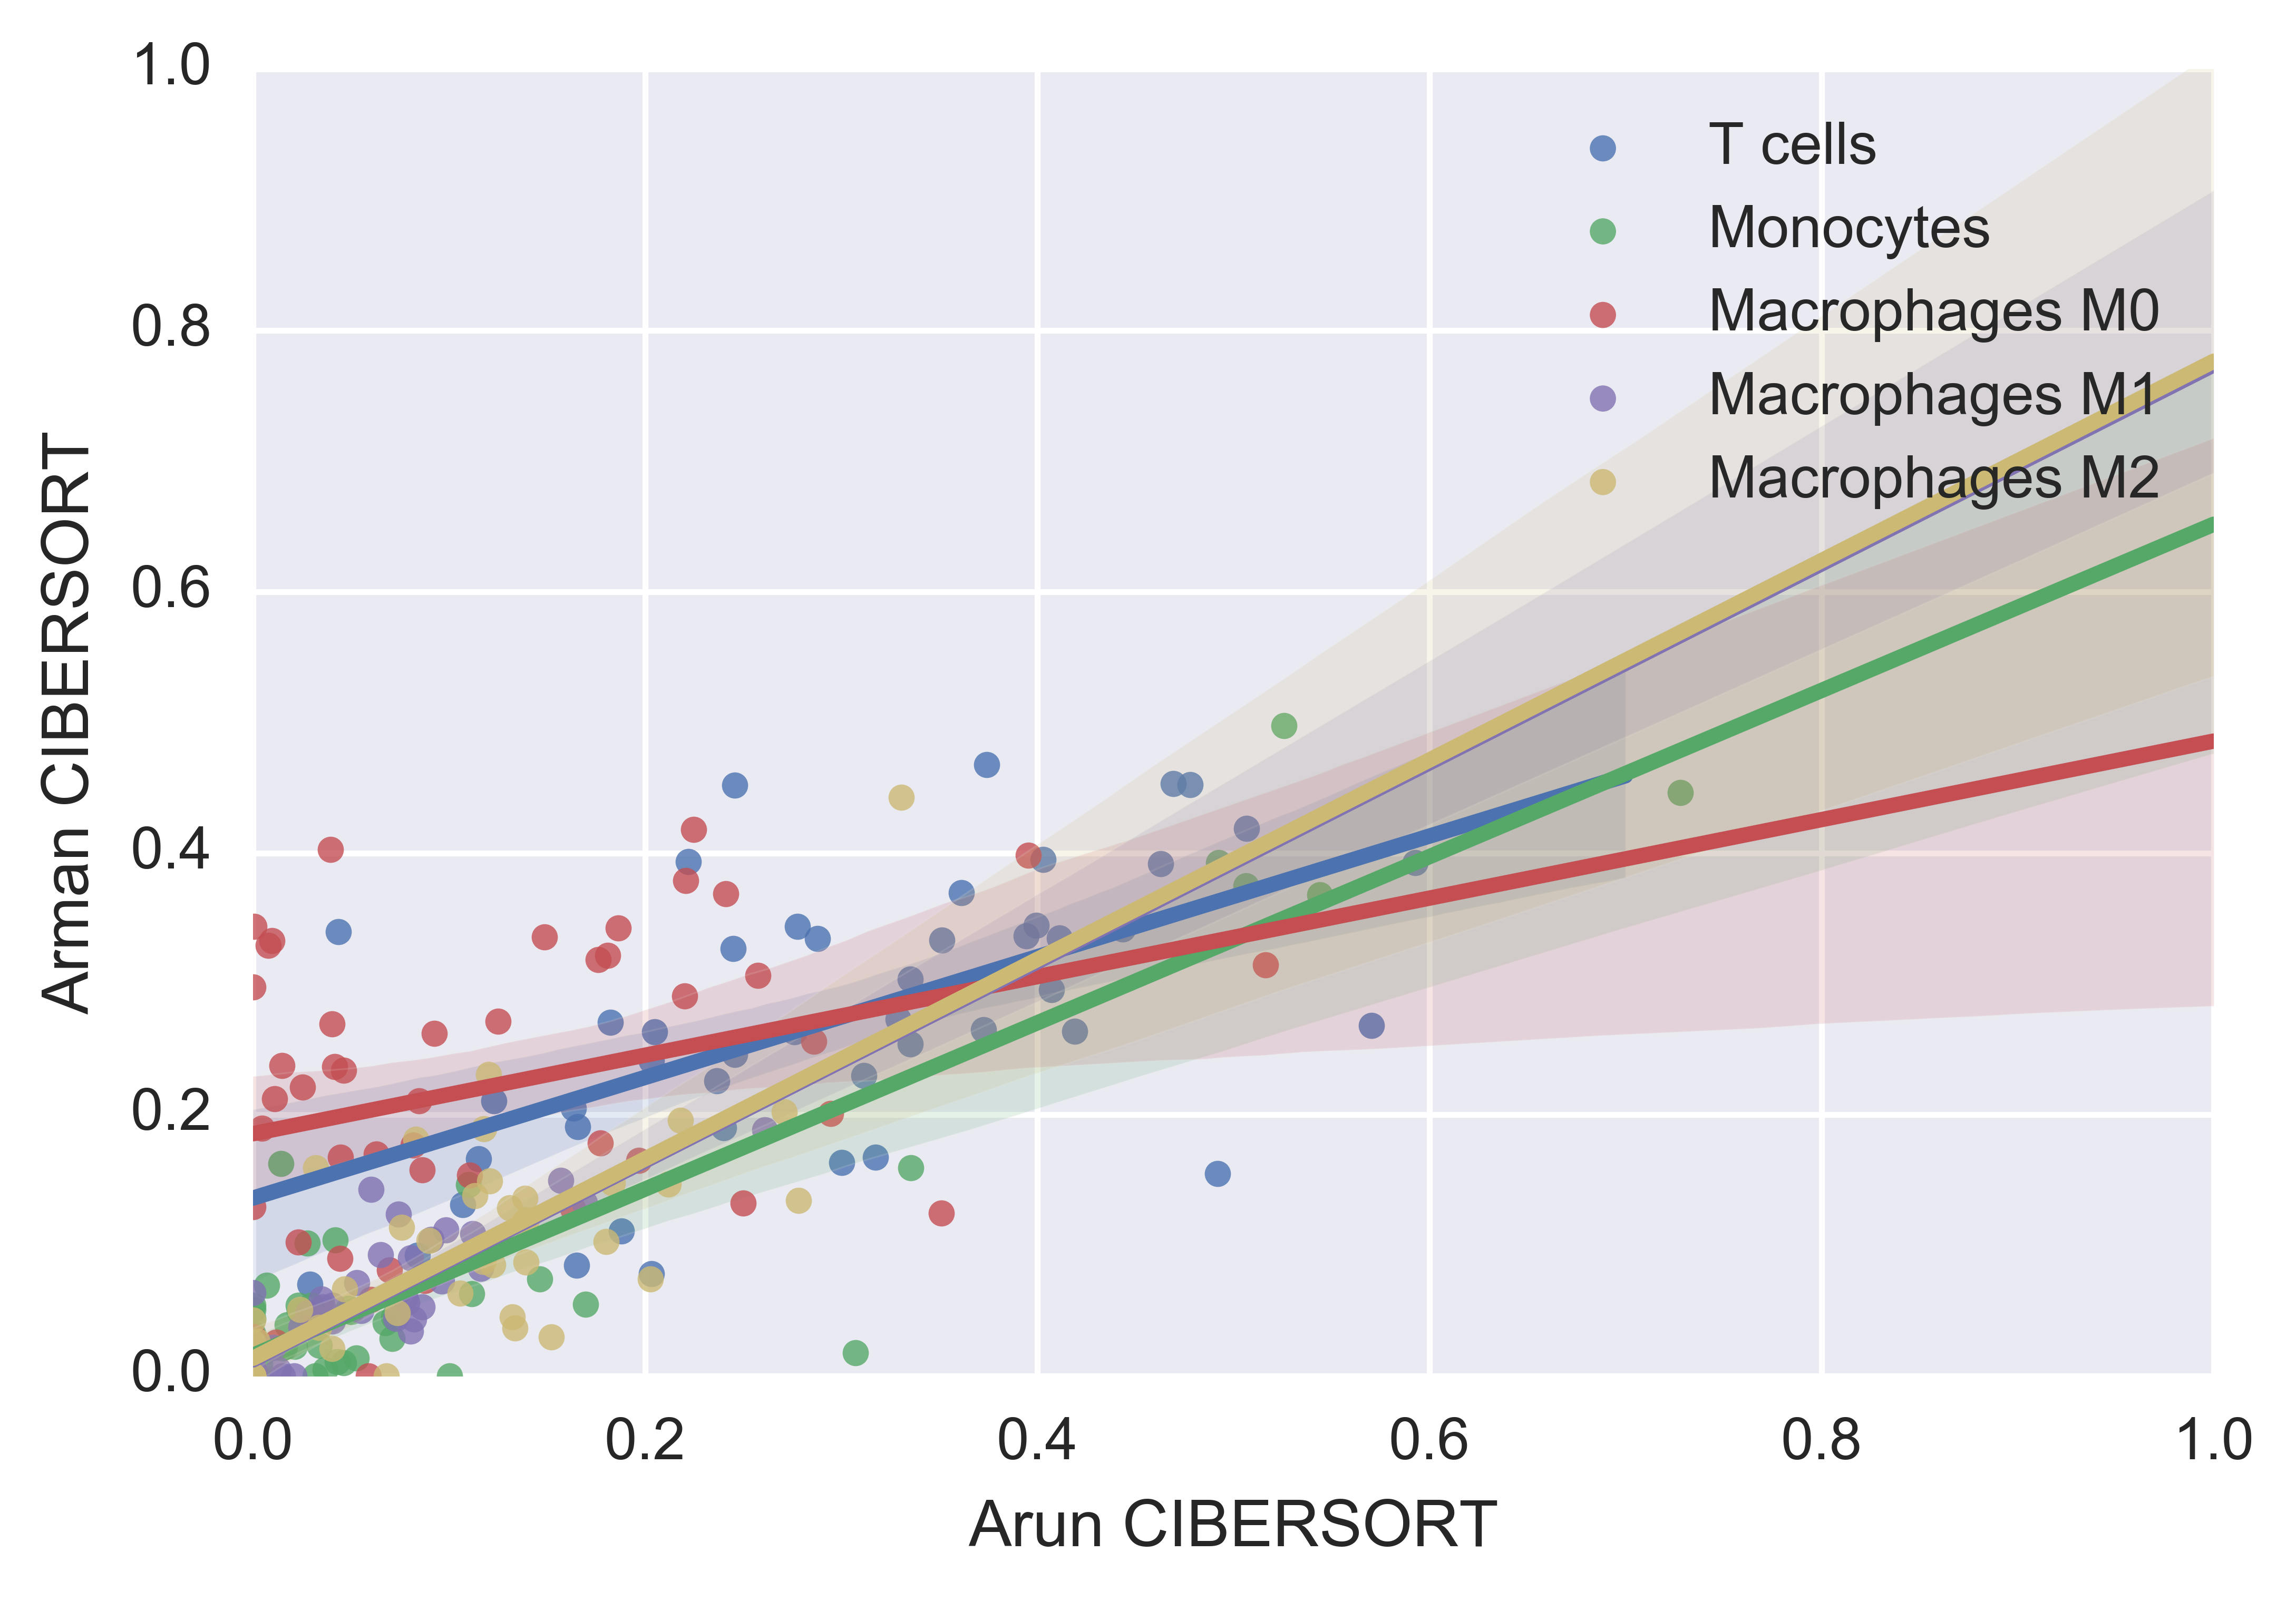

In [62]:
for col in ["T cells", "Monocytes", "Macrophages M0", "Macrophages M1", "Macrophages M2"]:
    seaborn.regplot(
        data=merged_df,
        x=col + " arun",
        y=col,
        label=col,
    )
    pyplot.xlim(xmin=0, xmax=1)
    pyplot.ylim(ymin=0, ymax=1)


pyplot.xlabel("Arun CIBERSORT")
pyplot.ylabel("Arman CIBERSORT")

pyplot.legend()

In [64]:
merged_df.columns.tolist()

['source_id',
 'RNA_id',
 'RNA biospecimen',
 'DNA_id',
 'DNA_biospecimen',
 'specimen_type_description',
 'CollectionPoint',
 'SpecimenType',
 'RNA data file',
 'DNA_sample_string',
 'icgc_sample_id',
 'project_code_x',
 'submitted_sample_id',
 'icgc_specimen_id',
 'submitted_specimen_id',
 'icgc_donor_id_x',
 'submitted_donor_id_x',
 'analyzed_sample_interval',
 'percentage_cellularity',
 'level_of_cellularity',
 'study',
 'study_specimen_involved_in',
 'specimen_type',
 'specimen_type_other',
 'specimen_interval',
 'specimen_donor_treatment_type',
 'specimen_donor_treatment_type_other',
 'specimen_processing',
 'specimen_storage',
 'tumour_confirmed',
 'tumour_histological_type',
 'tumour_grading_system',
 'tumour_grade',
 'tumour_stage_system',
 'tumour_stage',
 'cohort',
 'donor',
 'tissue_type',
 'timepoint',
 'treated',
 'metastasis',
 'interval_days',
 'bam_filename_tumor_dna',
 'bam_filename_tumor_rna',
 'treated_paired',
 'timepoint_paired',
 'protein changing',
 'peptides',


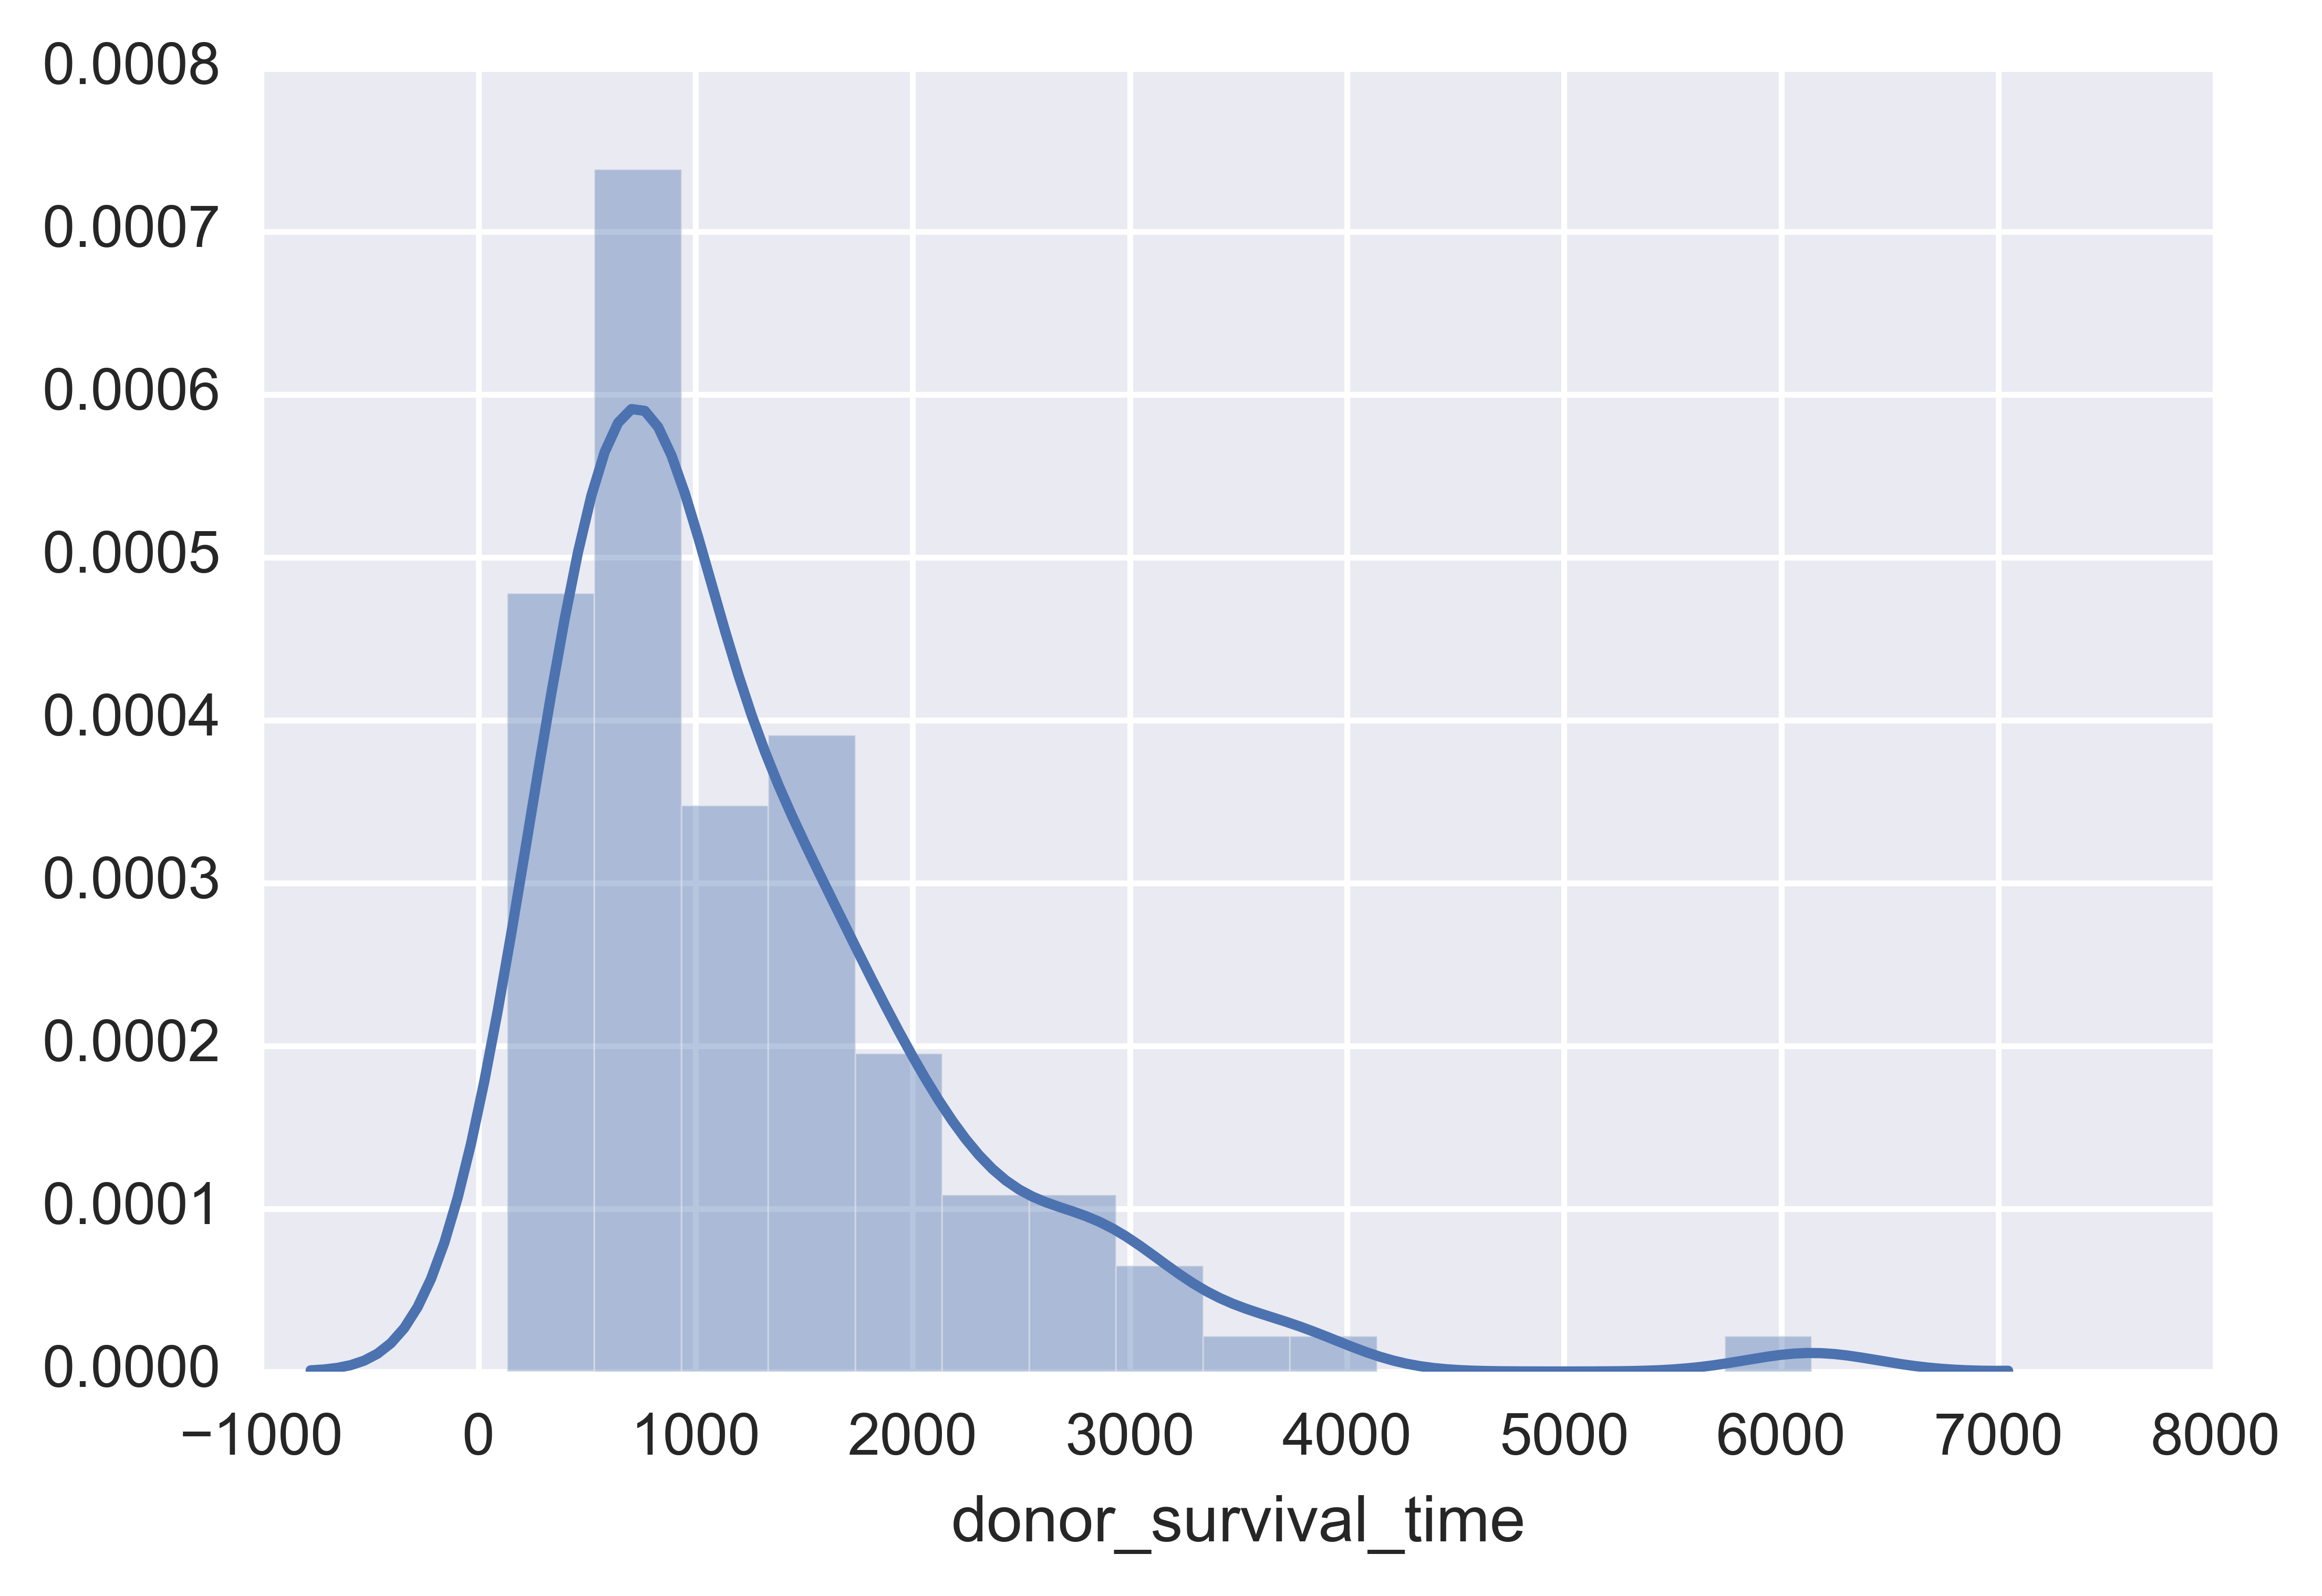

In [84]:
seaborn.distplot(merged_df.donor_survival_time.dropna())

(0, 3000)

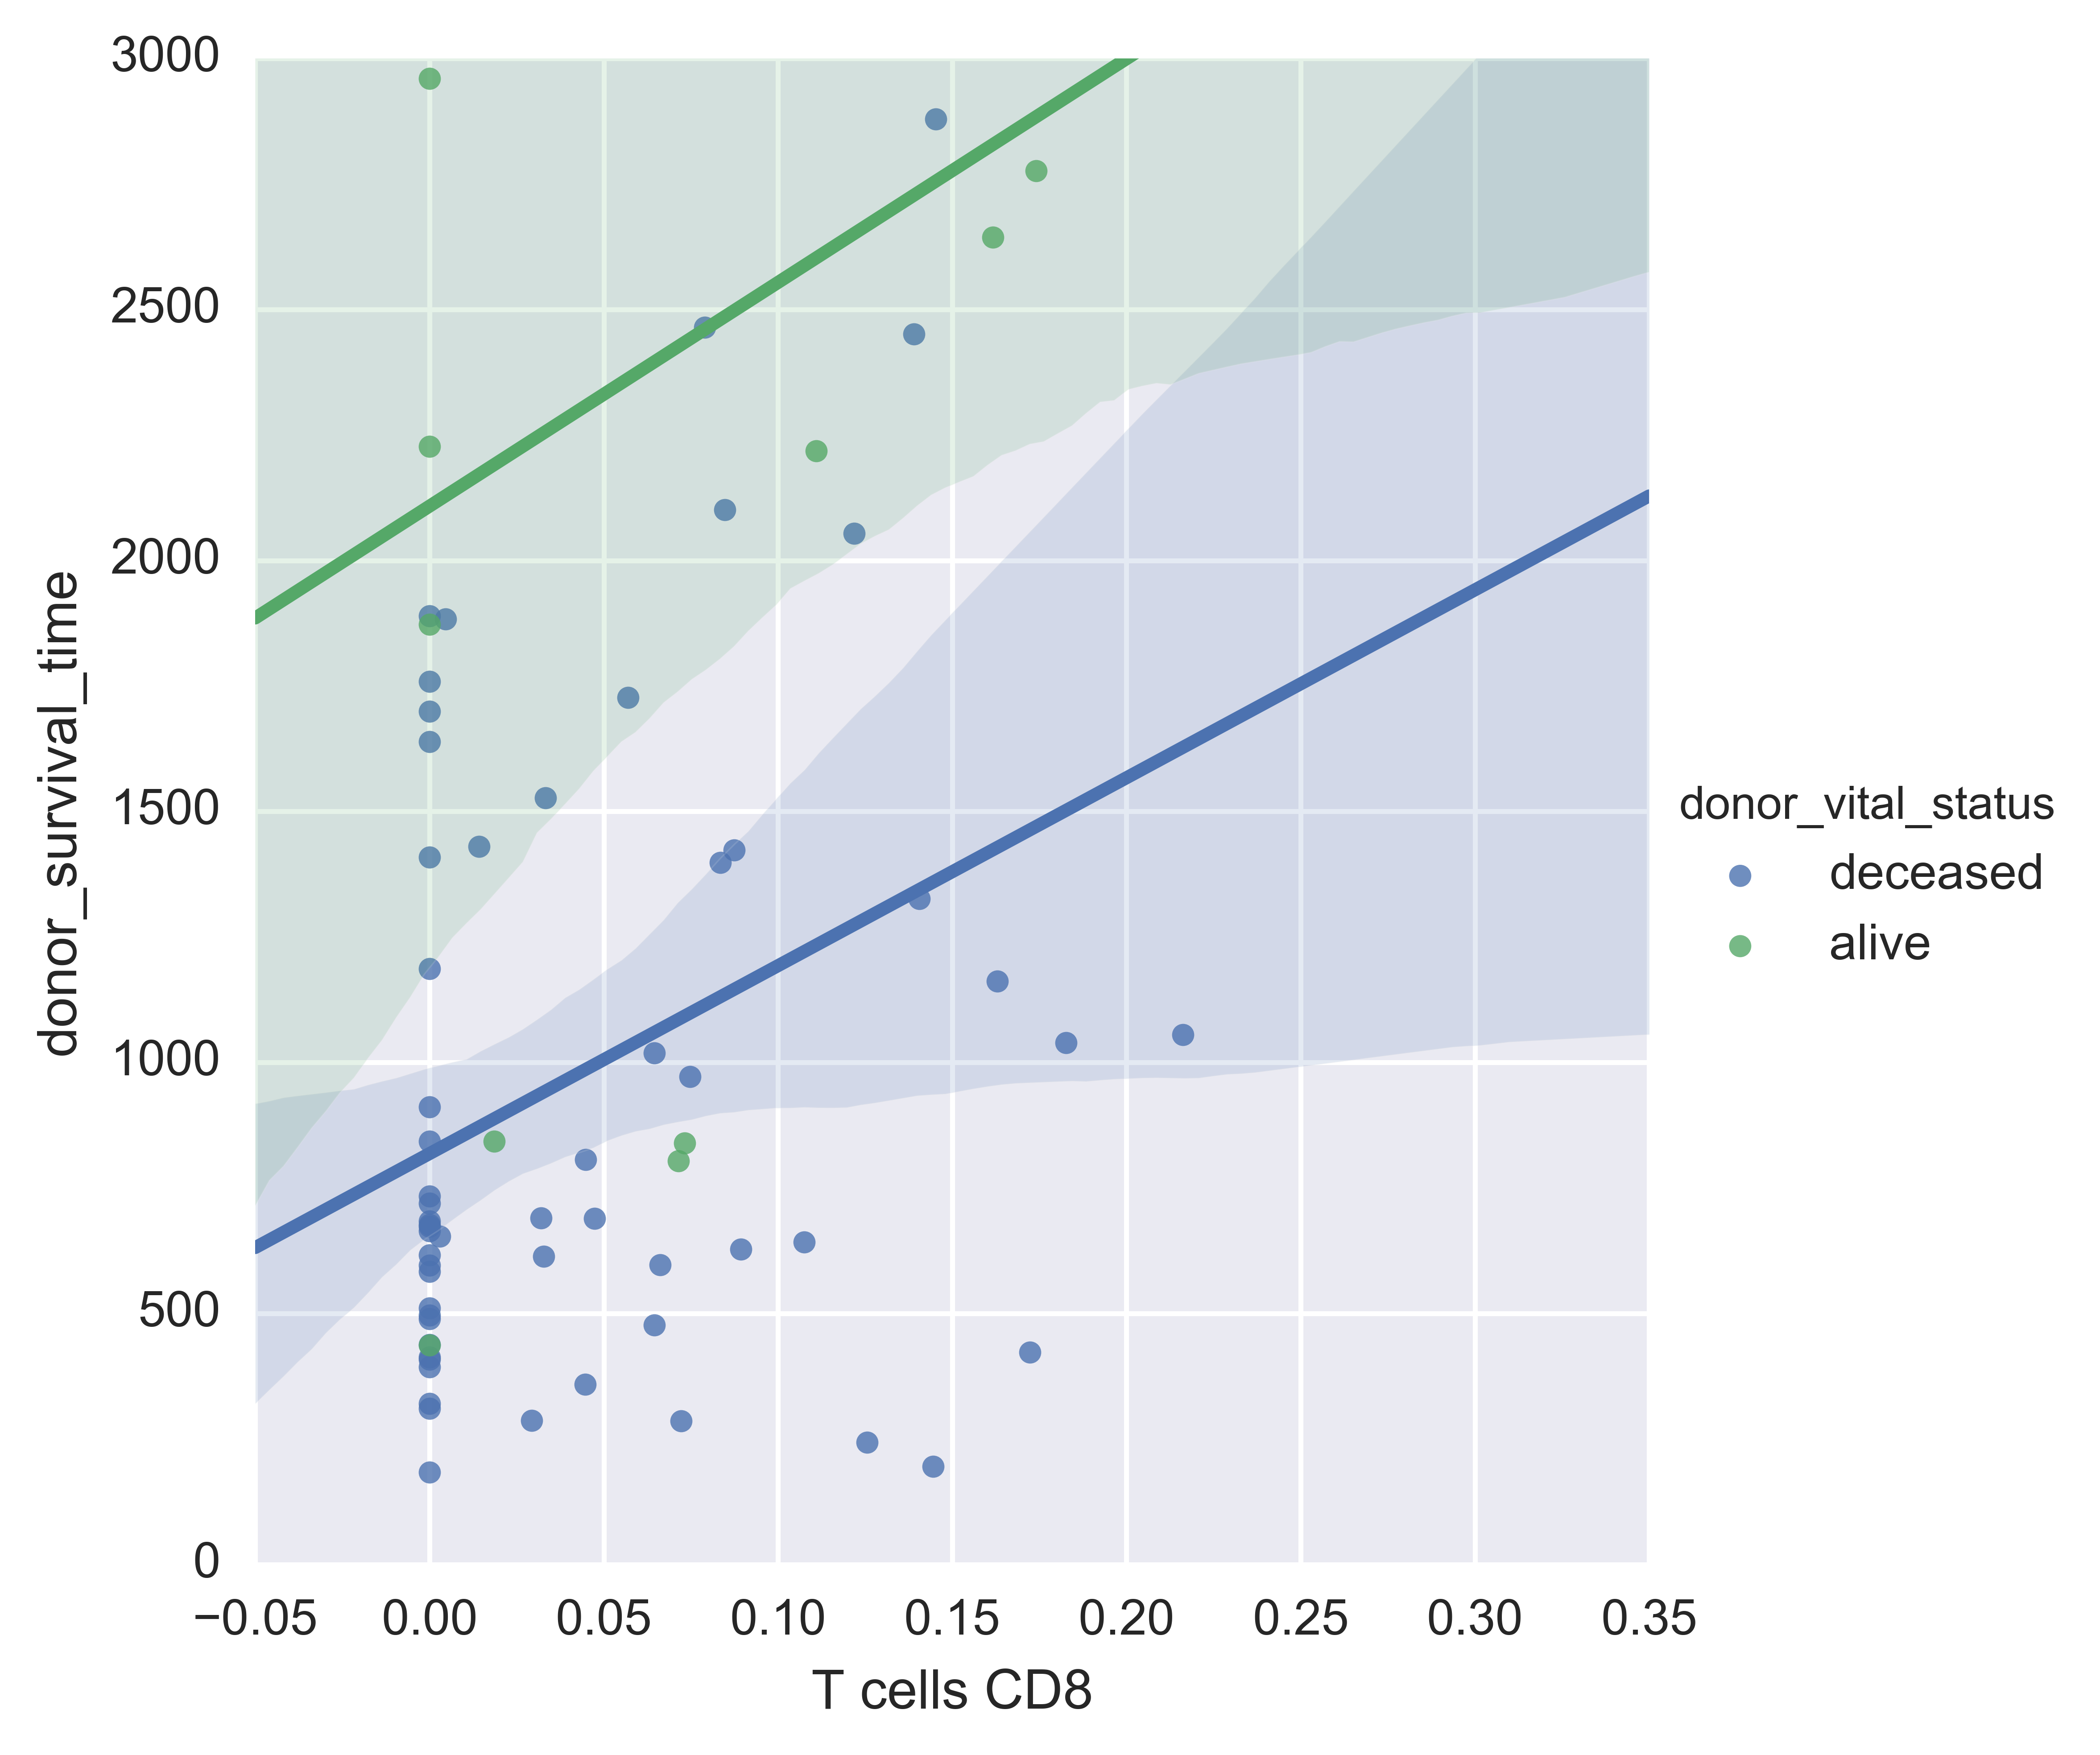

In [86]:
seaborn.lmplot(
    data=merged_df.ix[
        (merged_df.specific_treatment == "primary/untreated") &
        (merged_df.tissue_type == "solid")
    ],
    x="T cells CD8",
    y="donor_survival_time",
    hue="donor_vital_status",
    #robust=True,
    #logx=True,
)
pyplot.ylim(ymin=0, ymax=3000)

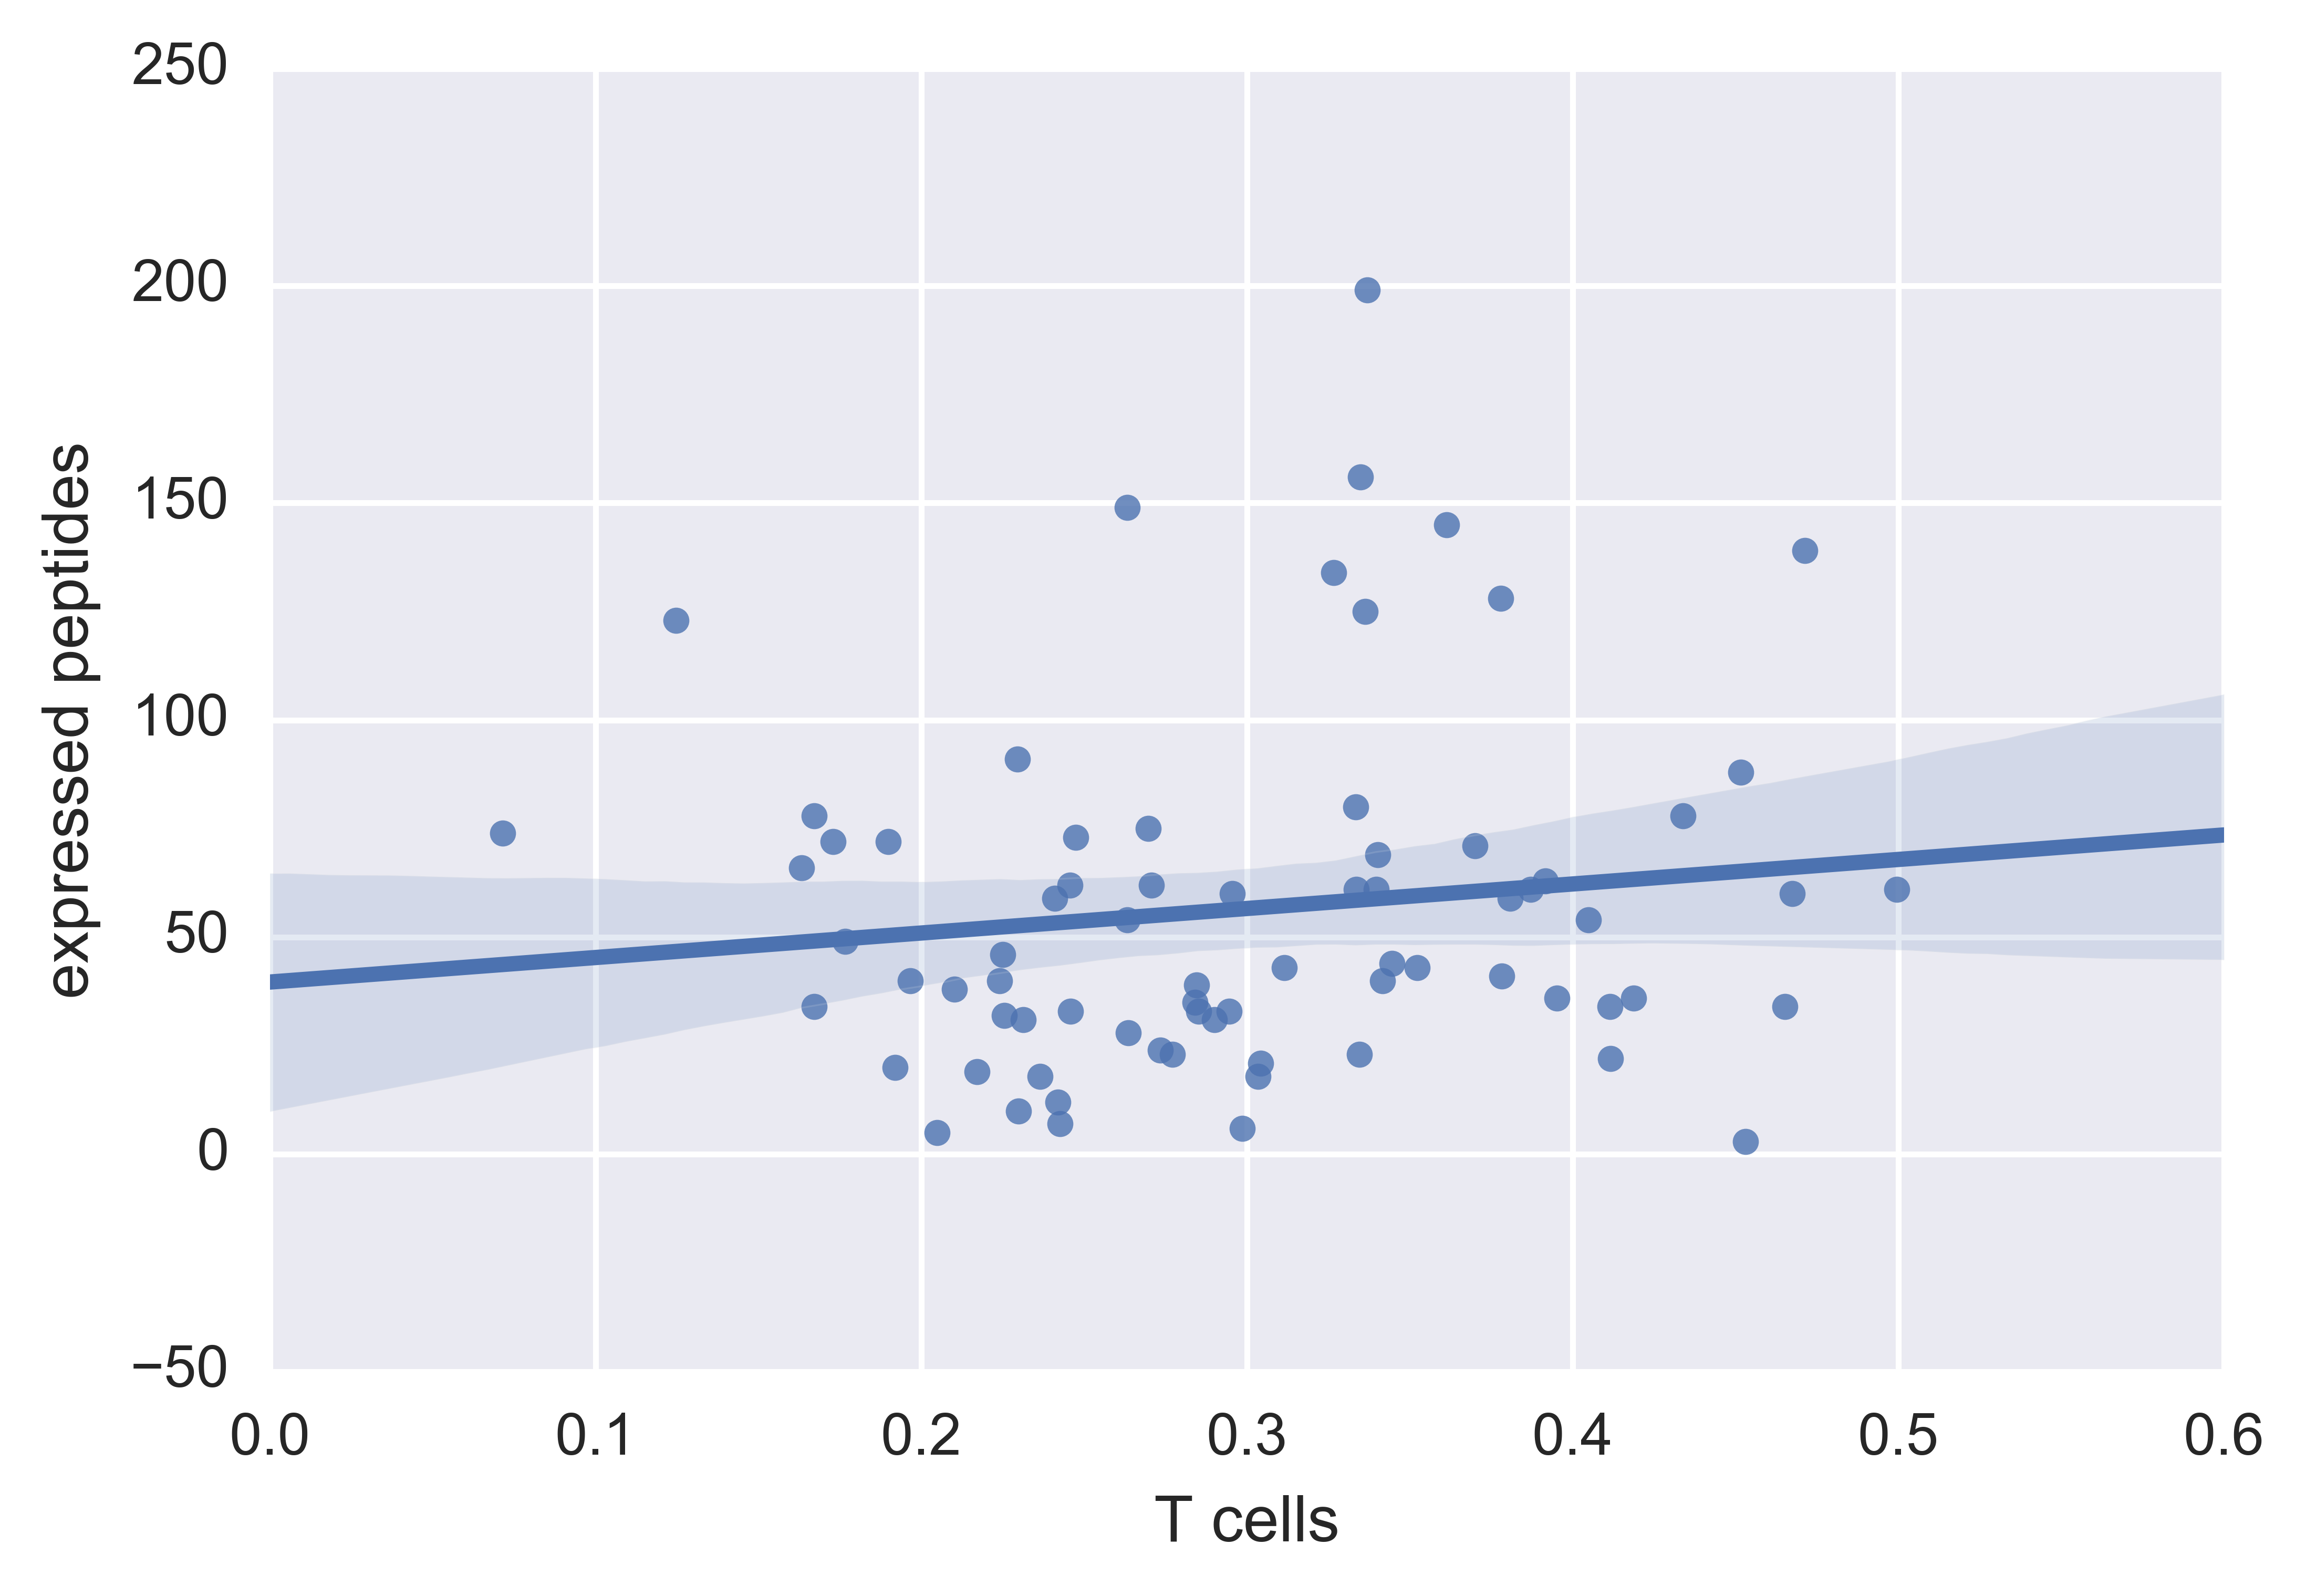

In [67]:
seaborn.regplot(
    data=merged_df.ix[
        (merged_df.specific_treatment == "primary/untreated") &
        (merged_df.tissue_type == "solid")
    ],
    x="T cells",
    y="expressed peptides",
)

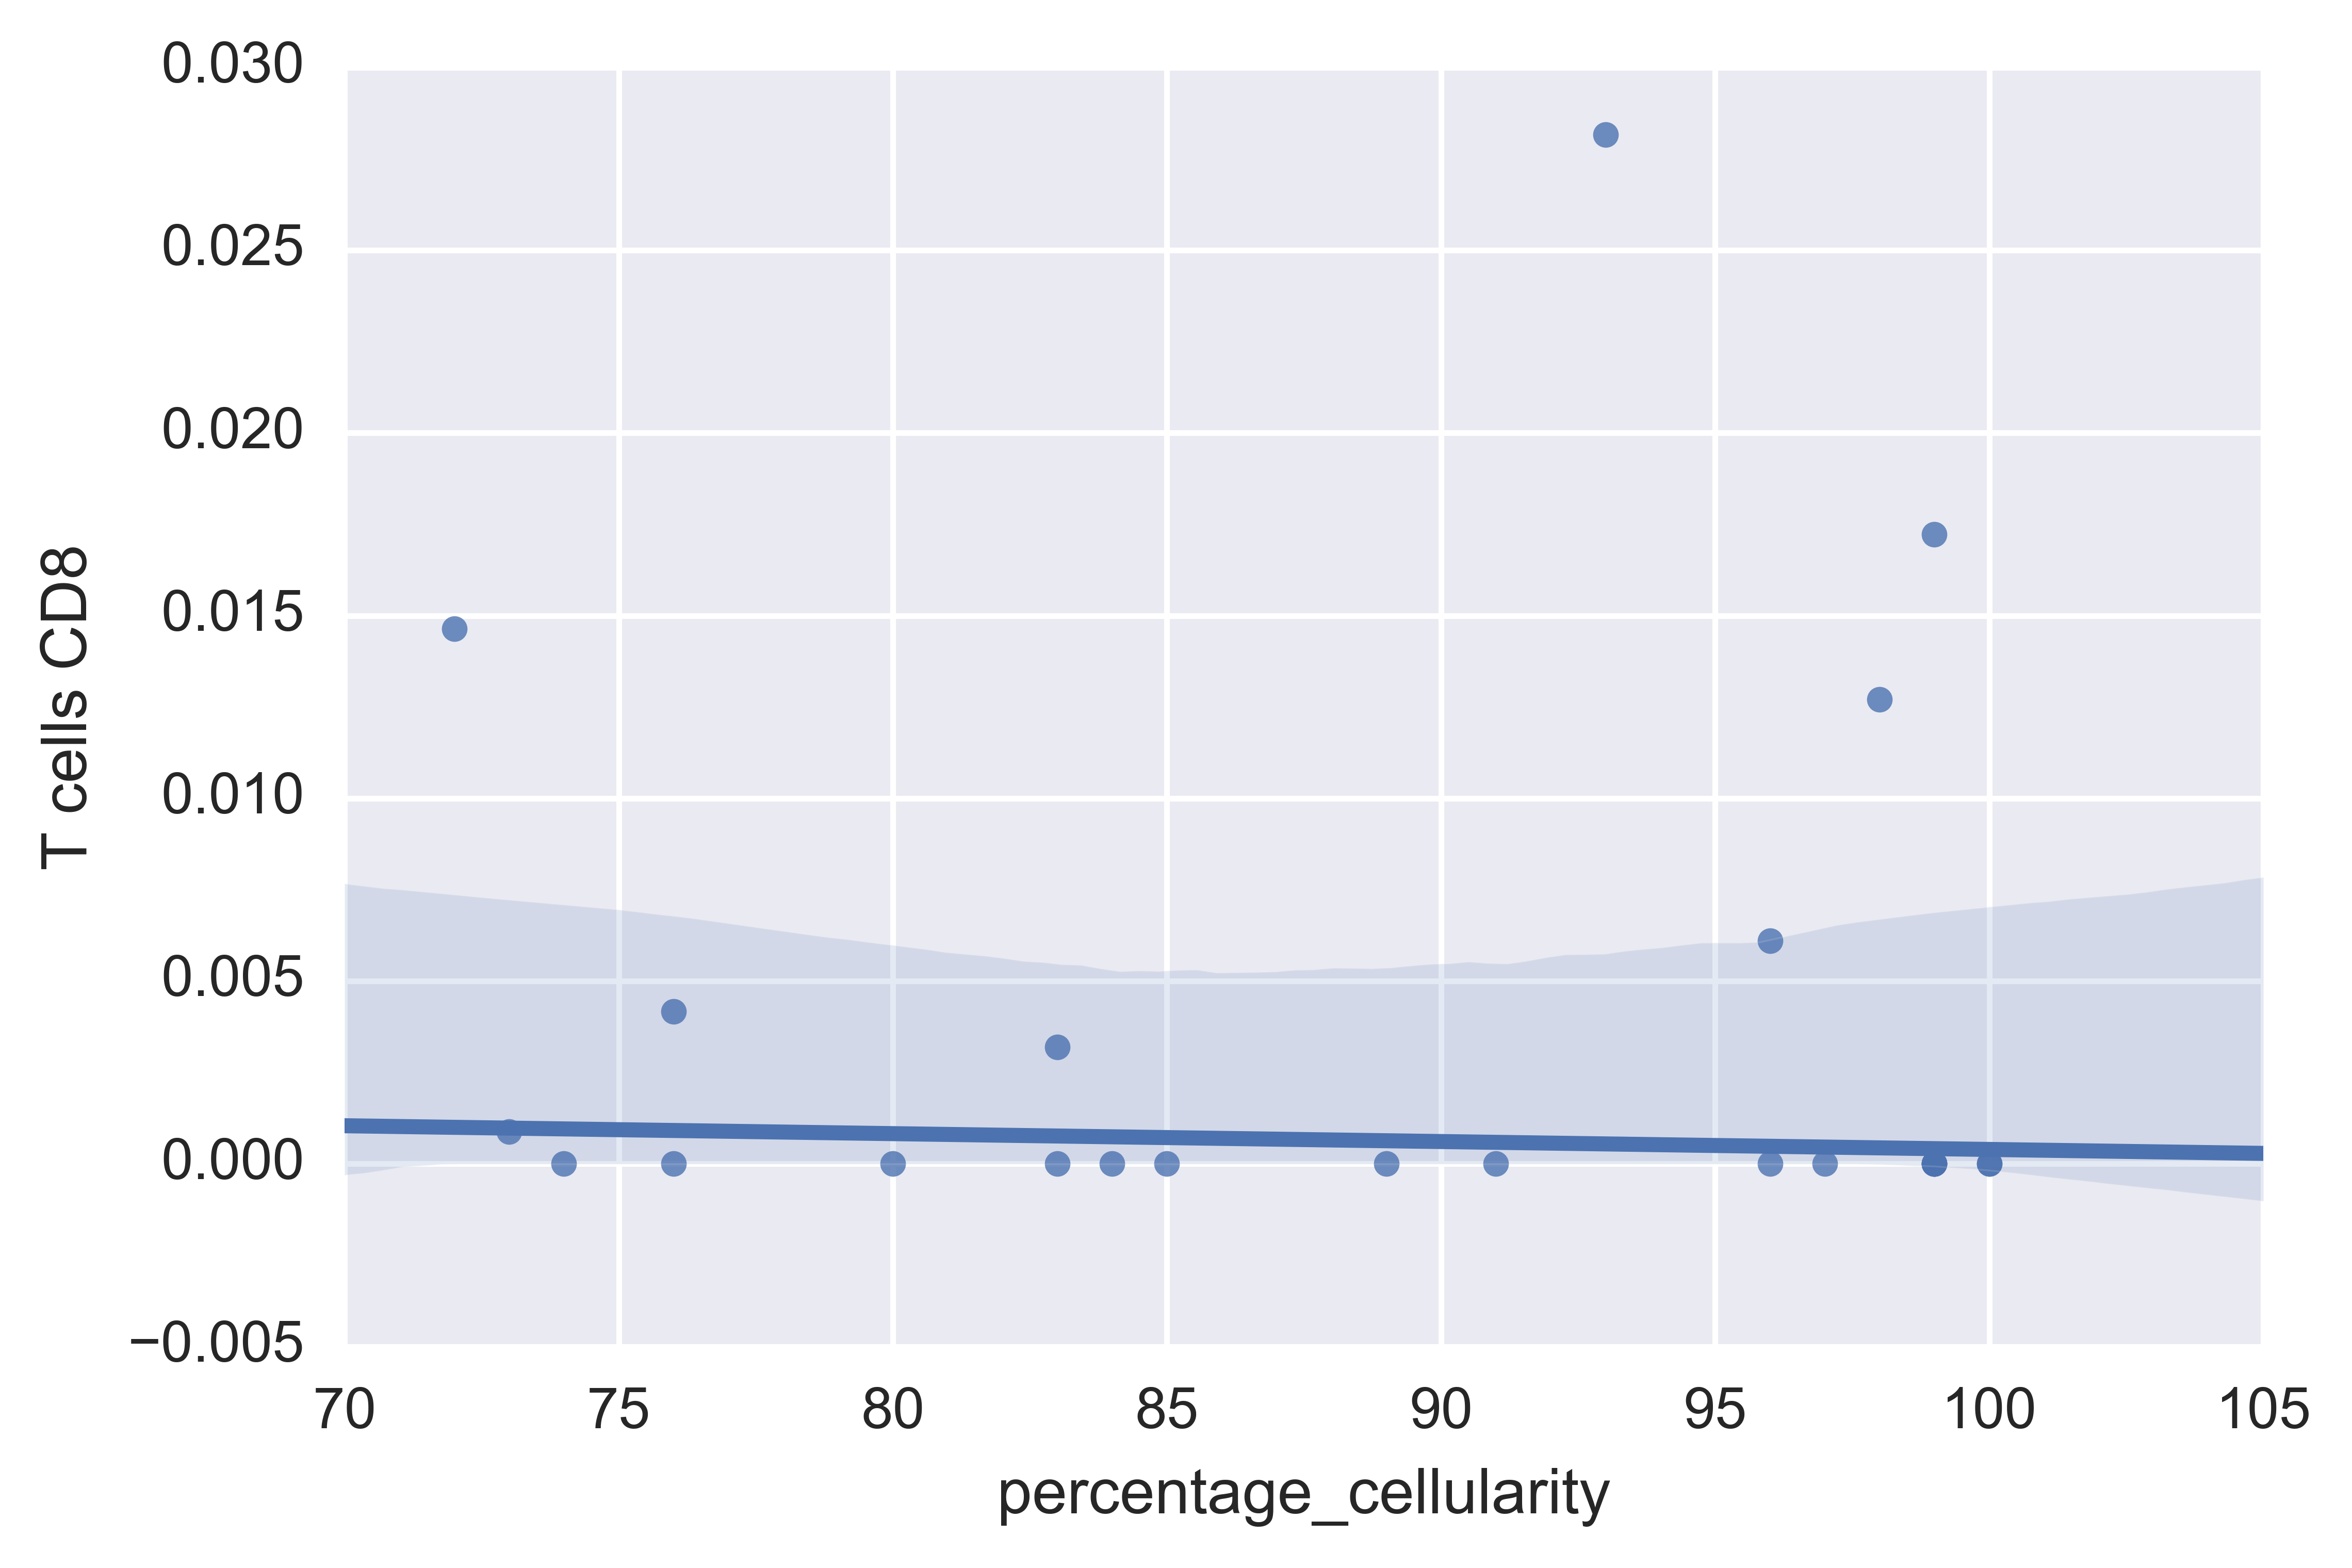

In [54]:
seaborn.regplot(
    data=merged_df.ix[merged_df.tissue_type == "ascites"],
    x="percentage_cellularity",
    y="T cells CD8",
    robust=True
)

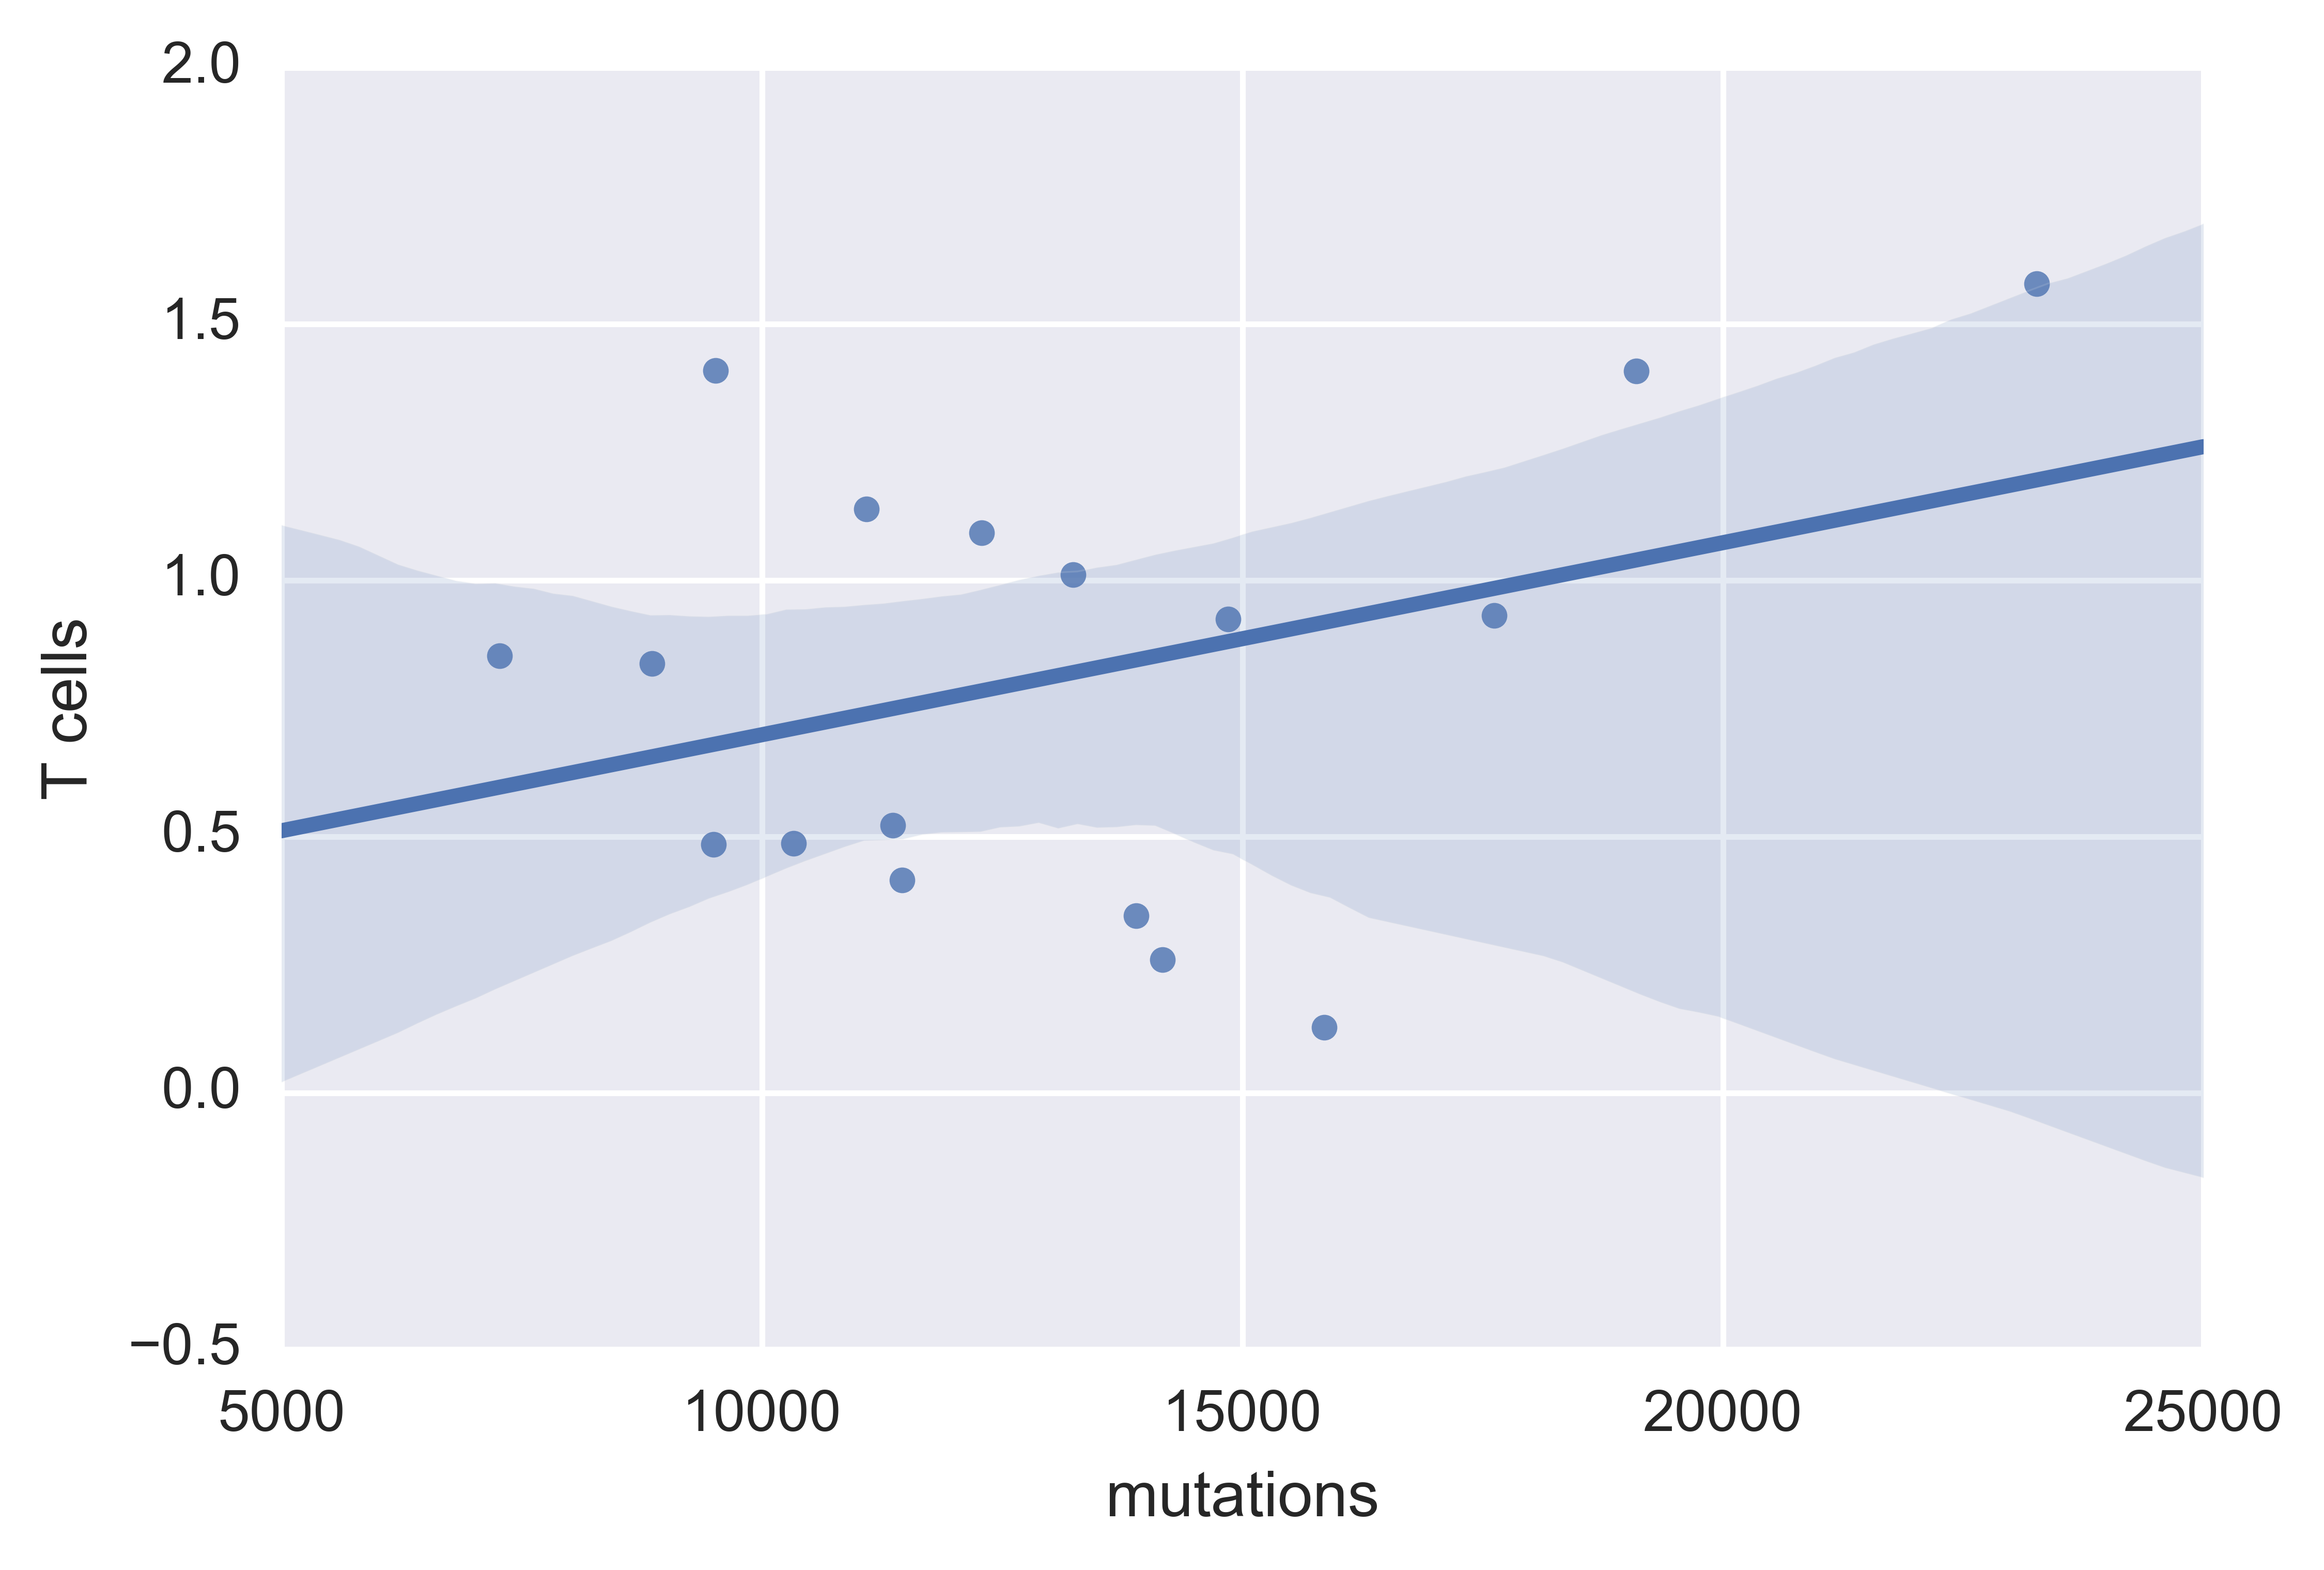

In [50]:
seaborn.regplot(
    data=merged_df.ix[merged_df.tissue_type == "ascites"],
    x="mutations",
    y="T cells",
    robust=True
)

In [52]:
merged_df.columns.tolist()

['source_id',
 'RNA_id',
 'RNA biospecimen',
 'DNA_id',
 'DNA_biospecimen',
 'specimen_type_description',
 'CollectionPoint',
 'SpecimenType',
 'RNA data file',
 'DNA_sample_string',
 'icgc_sample_id',
 'project_code',
 'submitted_sample_id',
 'icgc_specimen_id',
 'submitted_specimen_id',
 'icgc_donor_id',
 'submitted_donor_id',
 'analyzed_sample_interval',
 'percentage_cellularity',
 'level_of_cellularity',
 'study',
 'study_specimen_involved_in',
 'specimen_type',
 'specimen_type_other',
 'specimen_interval',
 'specimen_donor_treatment_type',
 'specimen_donor_treatment_type_other',
 'specimen_processing',
 'specimen_storage',
 'tumour_confirmed',
 'tumour_histological_type',
 'tumour_grading_system',
 'tumour_grade',
 'tumour_stage_system',
 'tumour_stage',
 'cohort',
 'donor',
 'tissue_type',
 'timepoint',
 'treated',
 'metastasis',
 'interval_days',
 'bam_filename_tumor_dna',
 'bam_filename_tumor_rna',
 'treated_paired',
 'timepoint_paired',
 'protein changing',
 'peptides',
 'expr

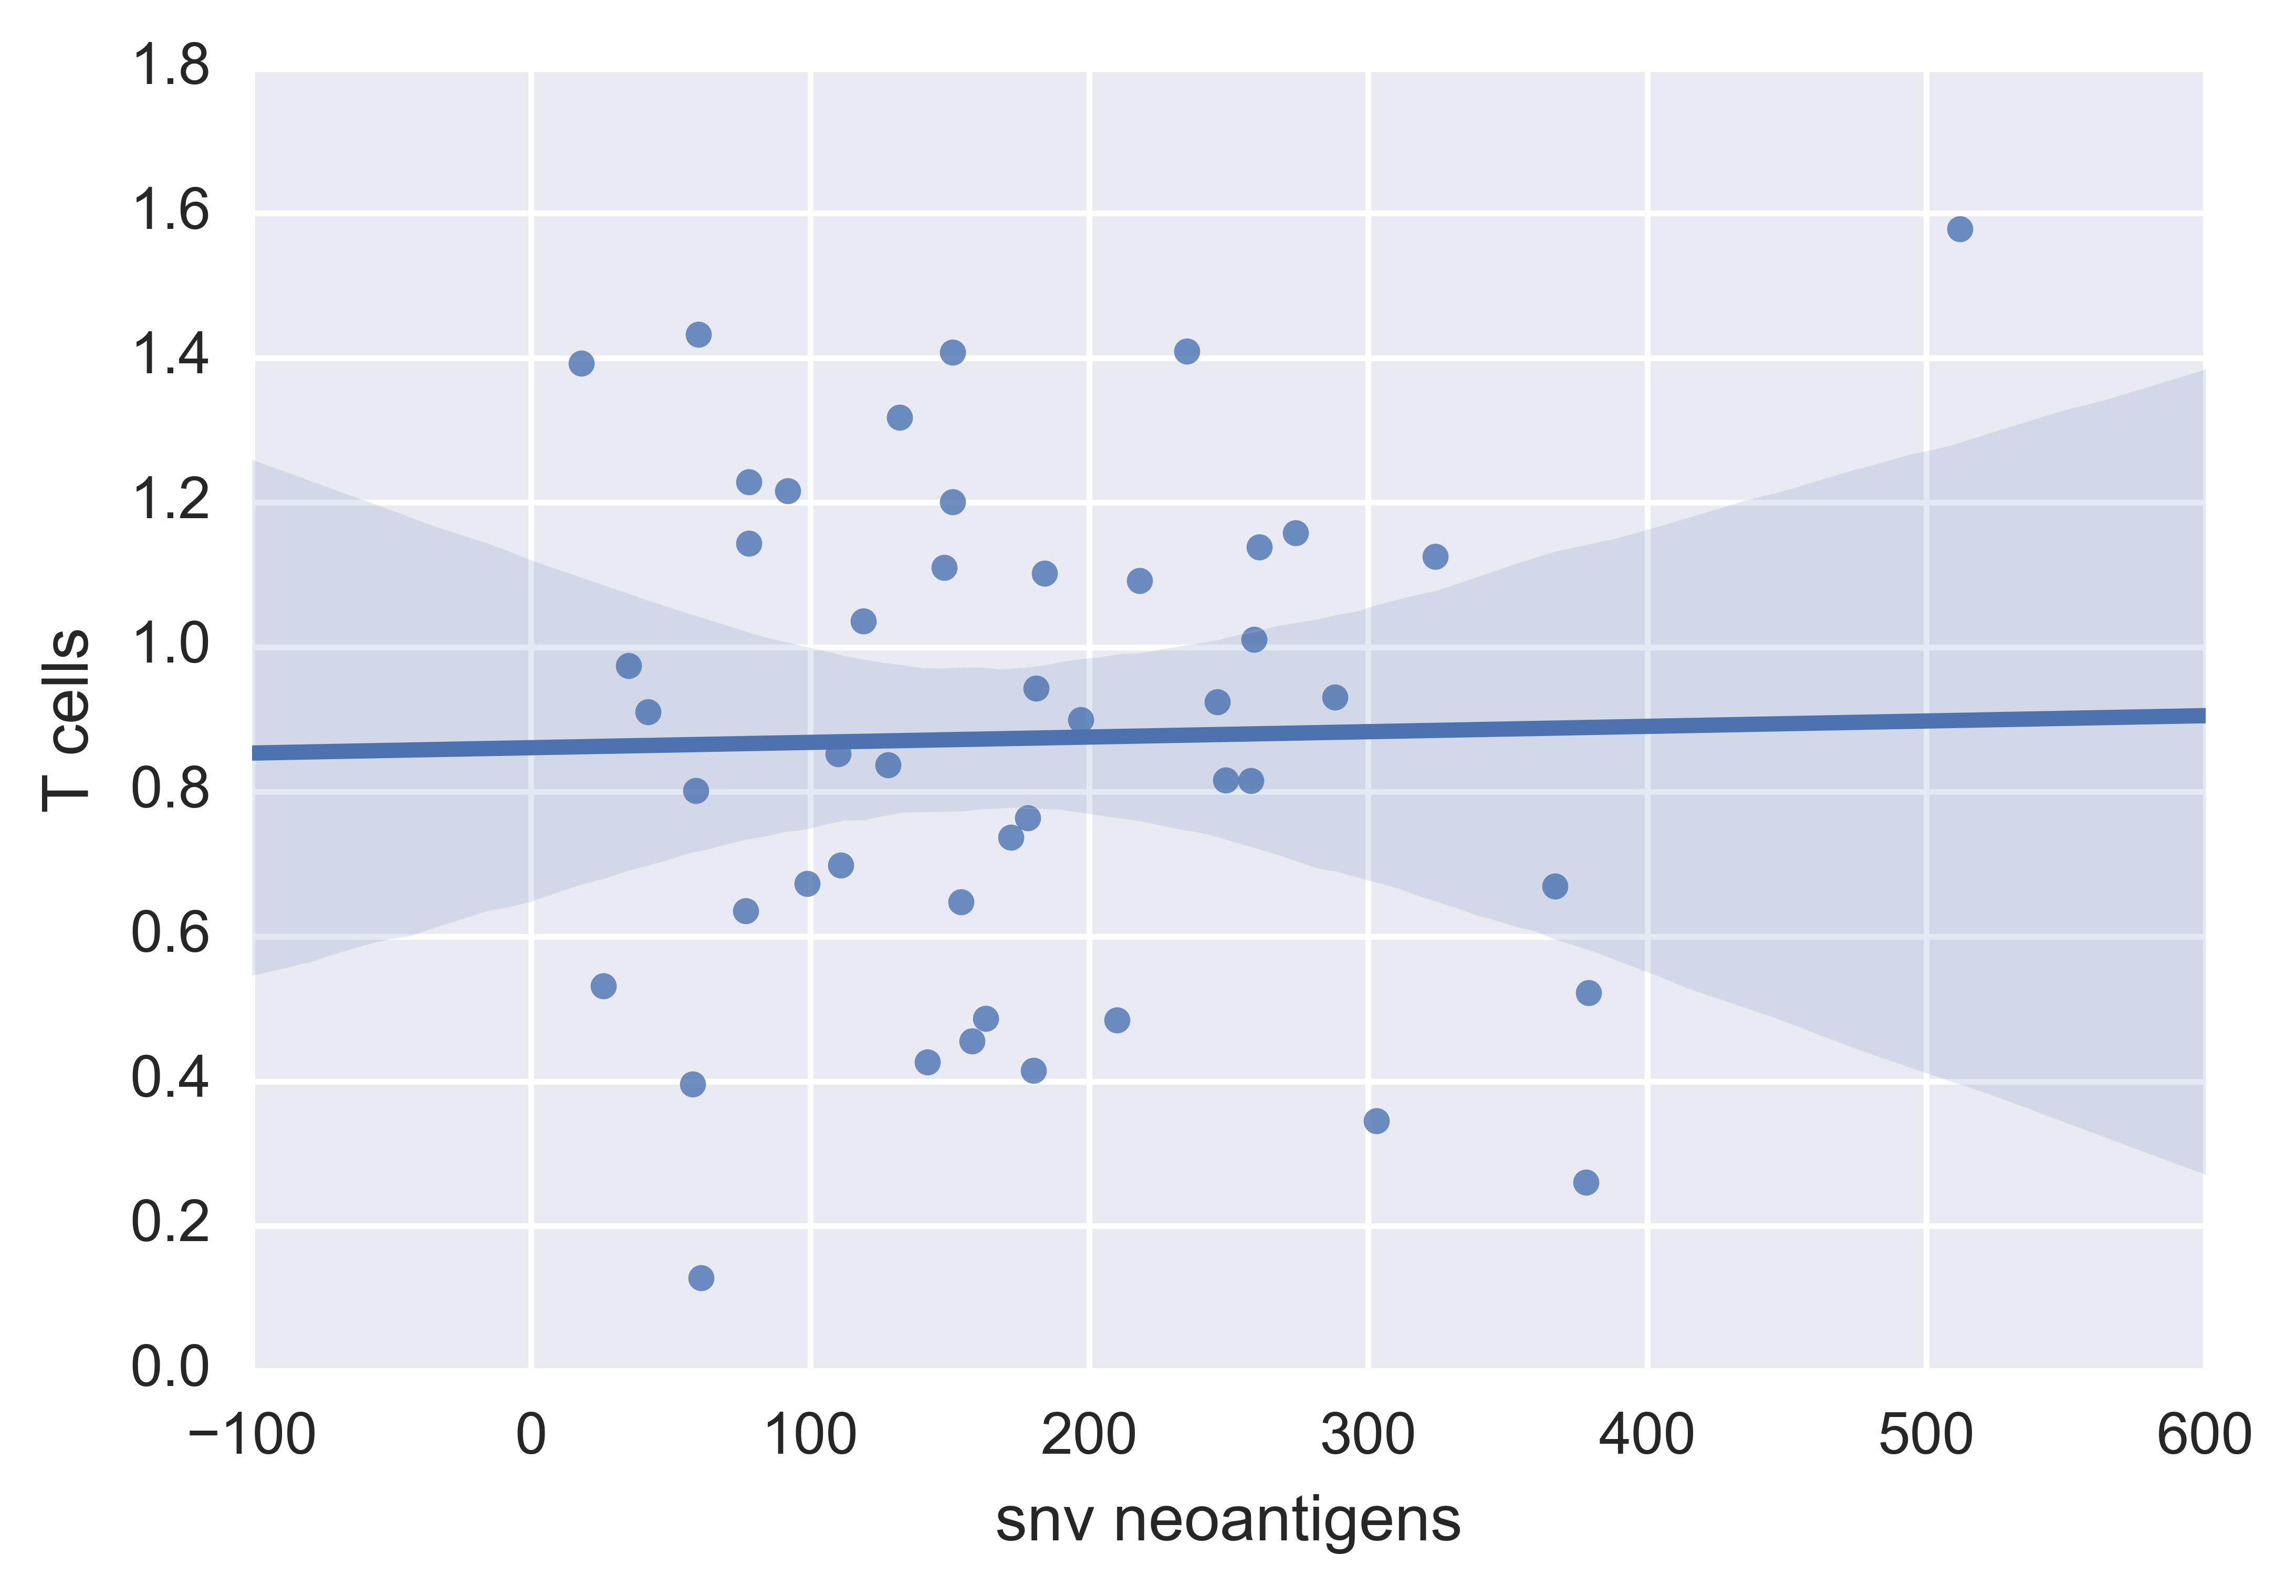

In [51]:
seaborn.regplot(
    data=merged_df,
    x="snv neoantigens",
    y="T cells",
)

In [ ]:
seaborn.lmplot(
    data=merged_df,
    x="percent_peptides_expressed",
    y="T cells",
    hue="tissue_type",
)

#merged_df["snv neoantigens"]

In [ ]:
paired_relapse_ascites = merged_df.ix[
    merged_df.treated_paired &
    (merged_df.specific_treatment == "relapse/treated") &
    (merged_df.tissue_type == "ascites")
].copy()
paired_relapse_ascites

In [ ]:
matched = merged_df.ix[
    merged_df.treated_paired &
    (merged_df.specific_treatment == "primary/untreated") &
    (merged_df.tissue_type == "solid")
].groupby("donor")["expressed peptides"].median()
matched

In [ ]:
paired_relapse_ascites["pre_treatment_expressed_neoantigens"] = paired_relapse_ascites.donor.map(matched)
paired_relapse_ascites["expressed neoantigen change"] = paired_relapse_ascites["expressed peptides"] - paired_relapse_ascites["pre_treatment_expressed_neoantigens"]

seaborn.lmplot(
    data=paired_relapse_ascites,
    x="expressed neoantigen change",
    y="T cells",
)

In [ ]:
cibersort_merged_df.ix[]

In [ ]:
cibersort_merged_df.groupby(["specific_treatment", "tissue_type", "treated_paired"]).donor.count()

In [ ]:
cibersort_merged_df.tissue_type.value_counts()

In [ ]:
merged_df.ix[merged_df.treated_paired & (~merged_df.has_cibersort)]

In [ ]:
merged_df["has T cells"] = merged_df["T cells"] > merged_df["T cells"].median()
seaborn.boxplot(data=merged_df.ix[~merged_df["T cells"].isnull()], x="has T cells", y="expressed peptides")
seaborn.swarmplot(data=merged_df.ix[~merged_df["T cells"].isnull()], x="has T cells", y="expressed peptides")
